# 2022 NZMSA Data Science Submission.

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

# Exploratory Data Analysis.
- From MM2, include center spread, skew and EOV check

In [4]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [5]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


It can be seen that the peak wind direction has no valid stations that contain data on this field and with very few containing information on gust. There are also some valid stations that do not have data for tmpc, dwpc, relh and sknt.

In [75]:
dFrame = pd.DataFrame(dataset)
dFrame.pop("gust")
dFrame.pop("peak_wind_drct")
dFrame['tmpc'].replace('', np.nan, inplace=True)
dFrame['dwpc'].replace('', np.nan, inplace=True)
dFrame['relh'].replace('', np.nan, inplace=True)
dFrame['sknt'].replace('', np.nan, inplace=True)
dFrame = dFrame.dropna()
dFrame['valid'] = pd.to_datetime(dFrame['valid'])
dFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0    station  103584 non-null  object        
 1   valid     103584 non-null  datetime64[ns]
 2   tmpc      103584 non-null  float64       
 3   dwpc      103584 non-null  float64       
 4   relh      103584 non-null  float64       
 5   sknt      103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.5+ MB


<AxesSubplot:>

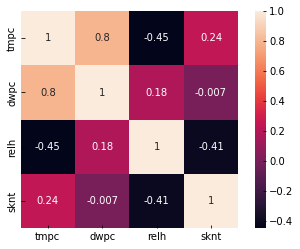

In [14]:
sns.heatmap(dFrame.corr(), annot=True, square =True)

/var/folders/xj/_s68zhld5zbbwgjgdpj9ww5m0000gn/T/ipykernel_6096/1114301025.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


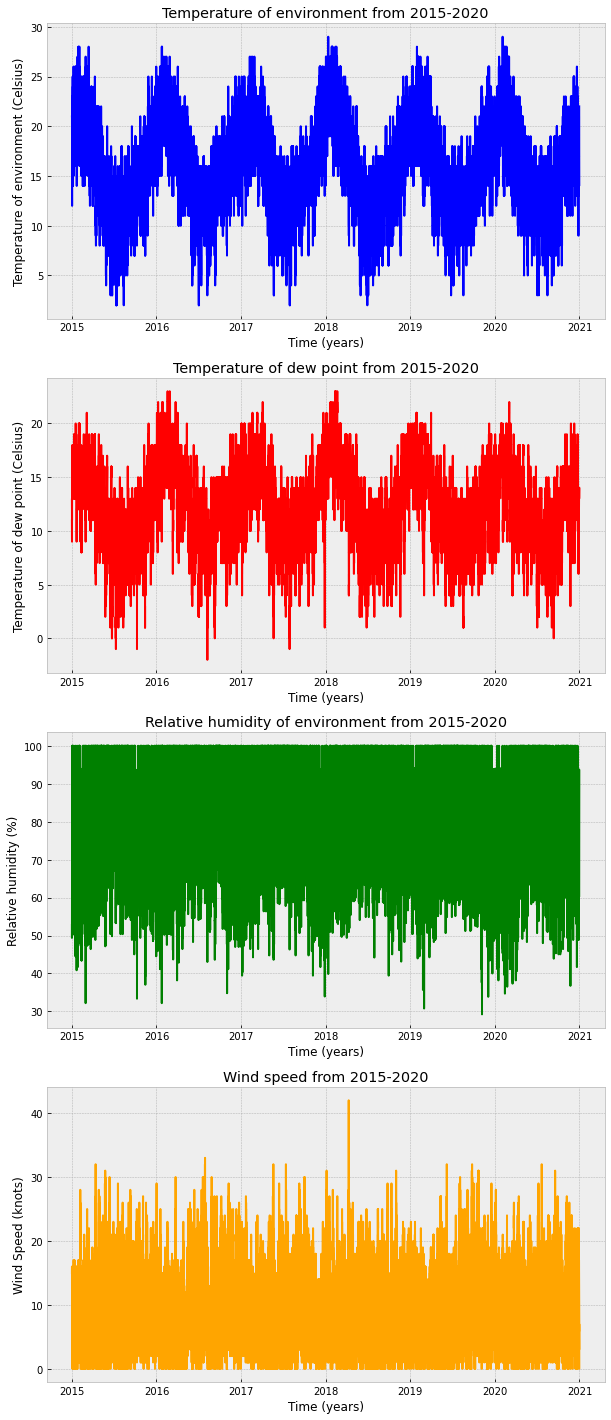

In [65]:
plt.style.use("bmh")
fig, (tmpc, dwpc, relh, sknt) = plt.subplots(nrows=4, ncols=1, squeeze=True)

tmpc.plot(dFrame["valid"], dFrame["tmpc"], color="blue")
tmpc.set_title("Temperature of environment from 2015-2020")
tmpc.set_xlabel("Time (years)")
tmpc.set_ylabel("Temperature of environment (Celsius)")

dwpc.plot(dFrame["valid"], dFrame["dwpc"], color="red")
dwpc.set_title("Temperature of dew point from 2015-2020")
dwpc.set_xlabel("Time (years)")
dwpc.set_ylabel("Temperature of dew point (Celsius)")

relh.plot(dFrame["valid"], dFrame["relh"], color="green")
relh.set_title("Relative humidity of environment from 2015-2020")
relh.set_xlabel("Time (years)")
relh.set_ylabel("Relative humidity (%)")

sknt.plot(dFrame["valid"], dFrame["sknt"], color="orange")
sknt.set_title("Wind speed from 2015-2020")
sknt.set_xlabel("Time (years)")
sknt.set_ylabel("Wind Speed (knots)")

fig.set_size_inches(10,25)

fig.show()

# EDA Comments
Overall, with the data provided, there is an interesting trend on temperature of the environment overtime representing an oscillating cosine wave. The others tend to a follow a very similar trend with one another. 

Through the correlation plot, it suggests that there is a strong correlation/relationship with the temperature of the environment with the temperature of the dew point.

In 2018, there is a large spike in temperature of dew and wind speed which represents abnormality, possibly suggesting an event of some sort in which may affect the overall trend when modelled.

# Data Processing
As done in the Exploratory Analysis, the gust and peak wind direction fields were deemed removed due to having limited data on the given fields. Within this analysis the removal of other points of data were deemed acceptable as these particular data did include missing fields.
To forecast the model for one month, the amount of half hours in a month are needed since the data is mapped per half hour in which there is 31 days in January which is equal to 744 hours, the steps would be 1488 to predict the next month.

Furthermore, the dataset needs to be converted into a format that a model can use, therefore the removal of the string values within the dataset is required.

In [78]:
dFrame.drop(columns=['valid', ' station'], inplace=True)
dFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103584 non-null  float64
 1   dwpc    103584 non-null  float64
 2   relh    103584 non-null  float64
 3   sknt    103584 non-null  float64
dtypes: float64(4)
memory usage: 4.0 MB


# Data Modelling
Decided to model temperature of the environment and temperature of the dew point due to having a very distinct shape of a trigonometric wave. Although, the relative humidity and wind speed are distinct, I chose to strictly leave these out due to some abnormal values presented. To fit the model, training of the model is required in order to make a forecast on the next month in which will be conducted through the last recorded month in December 2020

0.9719210989346462
0.9661782662713095


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sknt
- tmpc
Feature names seen at fit time, yet now missing:
- dwpc
- relh

  warnings.warn(message, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sknt
- tmpc
Feature names seen at fit time, yet now missing:
- dwpc
- relh

  warnings.warn(message, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature n

Text(0.5, 0, 'Month of January 2021')

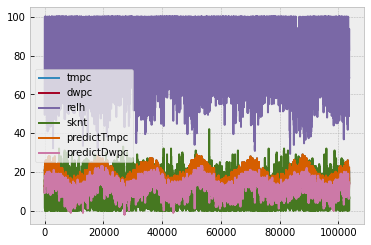

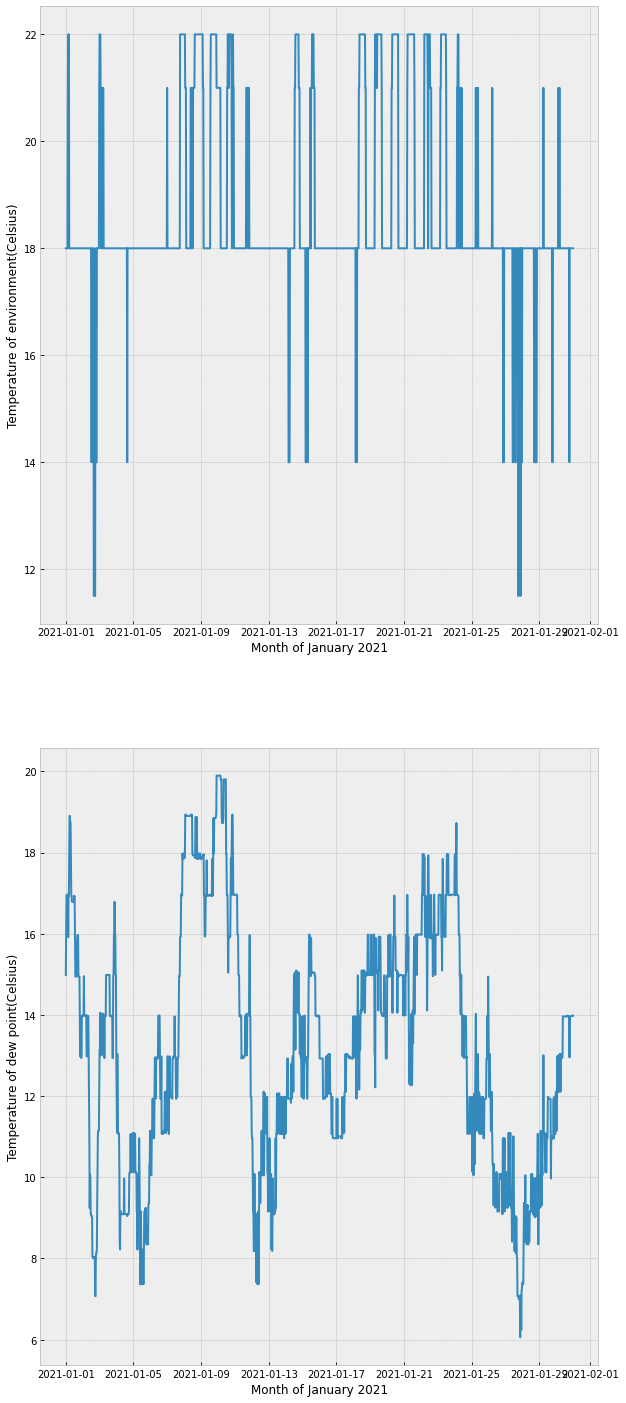

In [105]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
predictionSet = dFrame.copy()
predictionSet["predictTmpc"] = predictionSet.shift(-1)["tmpc"]
predictionSet["predictDwpc"] = predictionSet.shift(-1)["dwpc"]
predictionSet = predictionSet.iloc[:-1,:].copy()
predictionSet.plot()

def modelFit(chosenFactors, predictValue, model):
    fittedModel = model.fit(predictionSet[chosenFactors], predictionSet[predictValue])
    xtrain, xtest, ytrain, ytest = train_test_split(predictionSet[chosenFactors], predictionSet[predictValue], test_size=0.2)
    print(fittedModel.score(xtest,ytest))
    return fittedModel

def useModel(chosenFactors, predictValue, model):
    predictModel = model.predict(testset[chosenFactors])
    modelUpdate = np.array(predictModel).ravel()
    cast =pd.DataFrame({predictValue:modelUpdate})
    return predictModel

model = DecisionTreeRegressor()
temperatureFit = modelFit(["tmpc","sknt"], "predictTmpc",model)
dewTemperatureFit = modelFit(["dwpc","relh"], "predictDwpc",model)
testset = predictionSet.iloc[-1488:, :].copy()
predict_range = pd.date_range(start="1/1/2021", end="31/1/2021", periods=1488)
i = 0
while i < 1488:
    temperature = useModel(["tmpc","sknt"], "predictTmpc",temperatureFit)
    dewTemperature = useModel(["dwpc","relh"], "predictDwpc",dewTemperatureFit)
    testset["tmpc"] = temperature
    testset["dwpc"] = dewTemperature
    i = i + 1

fig, (modelTmpc, modelDwpc) = plt.subplots(2, 1)
fig.set_size_inches(10,25)
modelTmpc.plot(pd.DataFrame(predict_range), pd.DataFrame(temperature))
modelTmpc.set_ylabel("Temperature of environment(Celsius)")
modelTmpc.set_xlabel("Month of January 2021")
modelDwpc.plot(pd.DataFrame(predict_range), pd.DataFrame(dewTemperature))
modelDwpc.set_ylabel("Temperature of dew point(Celsius)")
modelDwpc.set_xlabel("Month of January 2021")

# Conclusion

* Overall, the performance of the model was great through proper basis of predictions and both models containing a great score that explains the almost all the variance in data
* Although parts of it seem choppy, it can be observed that it follows the same shape as the initial data provided.